## TASK 6.4 Machine Learning Part 1

### This script contains the following:

####   1.   Importing libraries and data
####   2.   Data cleaning
####   3.   Exploring and Deriving New Variables
####   4.   Hypothesis and Data prep for regression analysis 
####   5.   Regression analysis
####   6.   Create a plot that shows the regression line on the test set
####   7.   Regression Line Interpretation
####   8.   Check the model performance statistics—MSE and R2 score
####   9.   Compare the predicted y values with the actual y values in a dataframe
#### 10.   Projects Considerations on 
        - how well the model performed on the test
        - Possible Bias

### 1. Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs I create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
# define a path

path = r'C:\Users\junio\OneDrive\Career Foundry Project\Achievement 6\02-2024 Brazilian E-Commerce'

In [4]:
# Import data set

df_all = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'df_all_merged.csv'), index_col = False)

### 2. Data cleaning

In [5]:
df_all.shape

(101992, 26)

In [6]:
# Set display options to show all rows and columns

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [7]:
df_all.head(100)

,order_id,customer_id,purchase_date,delivered_customer_date,estimated_delivery_date,item_count,product_id,seller_id,price,freight_value,prod_category,Price category,review_score,review_title,review_comment,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,customer_geolocation_lat,customer_geolocation_lng,seller_zip_code_prefix,seller_city,seller_state,seller_geolocation_lat,seller_geolocation_lng
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,8.72,housewares,Low price,4,NaN,"Não testei o produto ainda, mas ele veio corre...",7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,-23.576475,-46.587290,9350,maua,SP,-23.680048,-46.443593
1,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,2017-08-15 18:29:31,2017-08-18 14:44:43,2017-08-28 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,7.78,housewares,Low price,4,NaN,Deveriam embalar melhor o produto. A caixa vei...,3a51803cc0d012c3b5dc8b7528cb05f7,3366,sao paulo,SP,-23.564807,-46.533982,9350,maua,SP,-23.680048,-46.443593
2,bfc39df4f36c3693ff3b63fcbea9e90a,53904ddbea91e1e92b2b3f1d09a7af86,2017-10-23 23:26:46,2017-11-07 18:04:59,2017-11-13 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,14.10,housewares,Low price,3,NaN,NaN,e781fdcc107d13d865fc7698711cc572,88032,florianopolis,SC,-27.532709,-48.494774,9350,maua,SP,-23.680048,-46.443593
3,44905b3e611d2f738de87a2cca4961b2,93a705448fbbe8d2c10f151c0510cd0c,2017-08-06 21:03:00,2017-08-14 19:36:05,2017-08-29 00:00:00,1,5a419dbf24a8c9718fe522b81c69f61a,3504c0cb71d7fa48d967e0e4c94d59d9,44.49,15.10,cool_stuff,Low price,5,NaN,muito bom!,1bbae4260b7887325fccae14a592c130,39100,diamantina,MG,-18.241008,-43.602296,9350,maua,SP,-23.680048,-46.443593
4,0010b2e5201cc5f1ae7e9c6cc8f5bd00,57ef317d4818cb42680fc9dfd13867ce,2017-09-11 17:39:33,2017-09-23 13:21:21,2017-09-27 00:00:00,1,5a419dbf24a8c9718fe522b81c69f61a,3504c0cb71d7fa48d967e0e4c94d59d9,48.90,16.60,cool_stuff,Low price,5,NaN,NaN,e883f26917e2095c439f70c2cf8c914b,22461,rio de janeiro,RJ,-22.961106,-43.211960,9350,maua,SP,-23.680048,-46.443593
5,de01100645b731556de153cfbebc35b1,94602ee2b2723266d391c94e7d1f4d89,2017-08-07 12:13:26,2017-08-17 18:24:38,2017-08-29 00:00:00,1,725cbfcaff95a4d43742fdf13cf43c75,3504c0cb71d7fa48d967e0e4c94d59d9,44.99,15.10,cool_stuff,Low price,5,NaN,fiquei muito satisfeita com o atendimento e co...,3b63e7ae5d6058eb51567425722cff95,35400,ouro preto,MG,-20.390773,-43.509832,9350,maua,SP,-23.680048,-46.443593
6,e55fb3457f263ce9c93e88a934d7cc17,f185f0c103eaf4cdb003c5fd33d29a9c,2017-09-06 09:52:11,2017-09-16 16:19:28,2017-09-19 00:00:00,1,5a419dbf24a8c9718fe522b81c69f61a,3504c0cb71d7fa48d967e0e4c94d59d9,48.90,11.73,cool_stuff,Low price,5,NaN,produto chegou dentro do prazo e em ótimas con...,082d6b71dce3485197b2204a0462acff,13186,hortolandia,SP,-22.888173,-47.202040,9350,maua,SP,-23.680048,-46.443593
7,03eae39a27aeab0f8c9ad5b84555a6d1,d91337c4d268a8a9f17bef015ce9af3d,2017-08-15 10:23:57,2017-08-19 16:06:37,2017-08-28 00:00:00,1,725cbfcaff95a4d43742fdf13cf43c75,3504c0cb71d7fa48d967e0e4c94d59d9,48.90,11.73,cool_stuff,Low price,5,NaN,Chegou antes do prazo,f4f203a8ddb0c3e44212a6eaf379348e,8441,sao paulo,SP,-23.534794,-46.407575,9350,maua,SP,-23.680048,-46.443593
8,5f49f31e537f8f1a496454b48edbe34d,a7260a6ccba78544ccfaf43f920b7240,2017-08-24 11:31:28,2017-08-28 20:12:20,2017-09-14 00:00:00,2,be03d93320192443b8fa24c0ca6ead98,3504c0cb71d7fa48d967e0e4c94d59d9,46.80,67.70,housewares,Low price,1,NaN,Prezados que porcaria de atendimento ao client...,7a1de9bde89aedca8c5fbad489c5571c,1315,sao paulo,SP,-23.553531,-46.640513,9350,maua,SP,-23.680048,-46.443593
9,0c511eb6cecb1f110a807dad27440c81,915411390c6b557e49b9cf369572d189,2017-09-26 14:45:50,2017-10-10 20:36:53,2017-10-25 00:00:00,1,725cbfcaff95a4d43742fdf13cf43c75,3504c0cb71d7fa48d9

##### Missing Values Check

In [8]:
# Check for missing values

df_all.isnull().sum()

# missing values found in review and comment section, as it is related to survey responses, they will be left unchanged.

order_id                        0
customer_id                     0
purchase_date                   0
delivered_customer_date         0
estimated_delivery_date         0
item_count                      0
product_id                      0
seller_id                       0
price                           0
freight_value                   0
prod_category                   0
Price category                  0
review_score                    0
review_title                89718
review_comment              59277
customer_unique_id              0
customer_zip_code_prefix        0
customer_city                   0
customer_state                  0
customer_geolocation_lat        0
customer_geolocation_lng        0
seller_zip_code_prefix          0
seller_city                     0
seller_state                    0
seller_geolocation_lat          0
seller_geolocation_lng          0
dtype: int64

##### Duplicates check

In [9]:
dups = df_all.duplicated()

In [10]:
dups.shape # No dups

(101992,)

In [11]:
df_all.columns

Index(['order_id', 'customer_id', 'purchase_date', 'delivered_customer_date',
       'estimated_delivery_date', 'item_count', 'product_id', 'seller_id',
       'price', 'freight_value', 'prod_category', 'Price category',
       'review_score', 'review_title', 'review_comment', 'customer_unique_id',
       'customer_zip_code_prefix', 'customer_city', 'customer_state',
       'customer_geolocation_lat', 'customer_geolocation_lng',
       'seller_zip_code_prefix', 'seller_city', 'seller_state',
       'seller_geolocation_lat', 'seller_geolocation_lng'],
      dtype='object')

### 3. Exploring Variables

In [12]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101992 entries, 0 to 101991
Data columns (total 26 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   order_id                  101992 non-null  object 
 1   customer_id               101992 non-null  object 
 2   purchase_date             101992 non-null  object 
 3   delivered_customer_date   101992 non-null  object 
 4   estimated_delivery_date   101992 non-null  object 
 5   item_count                101992 non-null  int64  
 6   product_id                101992 non-null  object 
 7   seller_id                 101992 non-null  object 
 8   price                     101992 non-null  float64
 9   freight_value             101992 non-null  float64
 10  prod_category             101992 non-null  object 
 11  Price category            101992 non-null  object 
 12  review_score              101992 non-null  int64  
 13  review_title              12274 non-null   o

#####  Convert date columns to datetime objects

In [13]:
df_all['purchase_date'] = pd.to_datetime(df_all['purchase_date'])
df_all['delivered_customer_date'] = pd.to_datetime(df_all['delivered_customer_date'])
df_all['estimated_delivery_date'] = pd.to_datetime(df_all['estimated_delivery_date'])

##### Derive a new variable with the 'average delivery time' in days after a customer purchases a product.

In [14]:
# Calculate delivery time for each order

df_all['delivery_time'] = (df_all['delivered_customer_date'] - df_all['purchase_date']).dt.days

In [30]:
# Group by customer_unique_id to calculate average delivery time overall that each customers waits fro their products

average_delivery_time = df_all.groupby('customer_unique_id')['delivery_time'].mean()

In [31]:
# Create a new DataFrame to store the average delivery time for each customer

average_delivery_df = pd.DataFrame(average_delivery_time).reset_index()

In [32]:
# Rename the column to reflect it's the average delivery time

average_delivery_df.rename(columns={'delivery_time': 'avg_delivery_time'}, inplace=True)

In [33]:
# Merge the average delivery time DataFrame with the original DataFrame

df_all_avg_delivery = df_all.merge(average_delivery_df, on='customer_unique_id', how='left')

In [34]:
df_all_avg_delivery['avg_delivery_time'].value_counts(dropna = False)

avg_delivery_time
7.000000      7850
6.000000      7004
8.000000      6915
9.000000      6185
5.000000      5996
10.000000     5868
11.000000     5284
4.000000      5049
12.000000     4776
13.000000     4410
3.000000      4011
14.000000     3876
2.000000      3297
15.000000     3204
16.000000     2611
17.000000     2386
18.000000     2215
19.000000     1820
20.000000     1722
1.000000      1641
21.000000     1463
22.000000     1192
23.000000     1031
24.000000      918
25.000000      801
26.000000      697
27.000000      614
28.000000      575
29.000000      456
30.000000      409
31.000000      349
32.000000      321
33.000000      298
34.000000      274
35.000000      272
36.000000      229
37.000000      179
38.000000      153
7.500000       152
39.000000      150
41.000000      142
11.500000      140
6.500000       136
42.000000      134
40.000000      129
8.500000       126
45.000000      123
12.500000      122
5.500000       120
13.500000      118
9.500000       112
43.000000    

In [35]:
df_all_avg_delivery.shape

(101992, 28)

In [36]:
# Check the mean of the average delivery times for the customers 
df_all_avg_delivery['avg_delivery_time'].mean()

11.872048788140244

In [37]:
# Find the maximum value of the average delivery times
df_all_avg_delivery['avg_delivery_time'].max()

208.0

In [38]:
# Find the minimum value of the average delivery times
df_all_avg_delivery['avg_delivery_time'].min()

0.0

##### Derive a new variable with the 'average review score' that a customer gives among their orders

In [45]:
# Group the df_all_avg_delivery dataframe by the 'order_id' column 

# the transform() function is applied on the 'review_score' column with the 'mean' argument 

df_all_avg_delivery['avg_review_score'] = df_all_avg_delivery.groupby(['order_id'])['review_score'].transform('mean')

In [46]:
df_all_avg_delivery.shape

(101992, 29)

In [47]:
df_all_avg_delivery.head()

,order_id,customer_id,purchase_date,delivered_customer_date,estimated_delivery_date,item_count,product_id,seller_id,price,freight_value,prod_category,Price category,review_score,review_title,review_comment,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,customer_geolocation_lat,customer_geolocation_lng,seller_zip_code_prefix,seller_city,seller_state,seller_geolocation_lat,seller_geolocation_lng,delivery_time,avg_delivery_time,avg_review_score
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,8.72,housewares,Low price,4,NaN,"Não testei o produto ainda, mas ele veio corre...",7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,-23.576475,-46.587290,9350,maua,SP,-23.680048,-46.443593,8,4.5,4.0
1,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,2017-08-15 18:29:31,2017-08-18 14:44:43,2017-08-28,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,7.78,housewares,Low price,4,NaN,Deveriam embalar melhor o produto. A caixa vei...,3a51803cc0d012c3b5dc8b7528cb05f7,3366,sao paulo,SP,-23.564807,-46.533982,9350,maua,SP,-23.680048,-46.443593,2,2.0,4.0
2,bfc39df4f36c3693ff3b63fcbea9e90a,53904ddbea91e1e92b2b3f1d09a7af86,2017-10-23 23:26:46,2017-11-07 18:04:59,2017-11-13,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,14.10,housewares,Low price,3,NaN,NaN,e781fdcc107d13d865fc7698711cc572,88032,florianopolis,SC,-27.532709,-48.494774,9350,maua,SP,-23.680048,-46.443593,14,14.0,3.0
3,44905b3e611d2f738de87a2cca4961b2,93a705448fbbe8d2c10f151c0510cd0c,2017-08-06 21:03:00,2017-08-14 19:36:05,2017-08-29,1,5a419dbf24a8c9718fe522b81c69f61a,3504c0cb71d7fa48d967e0e4c94d59d9,44.49,15.10,cool_stuff,Low price,5,NaN,muito bom!,1bbae4260b7887325fccae14a592c130,39100,diamantina,MG,-18.241008,-43.602296,9350,maua,SP,-23.680048,-46.443593,7,7.0,5.0
4,0010b2e5201cc5f1ae7e9c6cc8f5bd00,57ef317d4818cb42680fc9dfd13867ce,2017-09-11 17:39:33,2017-09-23 13:21:21,2017-09-27,1,5a419dbf24a8c9718fe522b81c69f61a,3504c0cb71d7fa48d967e0e4c94d59d9,48.90,16.60,cool_stuff,Low price,5,NaN,NaN,e883f26917e2095c439f70c2cf8c914b,22461,rio de janeiro,RJ,-22.961106,-43.211960,9350,maua,SP,-23.680048,-46.443593,11,11.0,5.0


In [48]:
df_all_avg_delivery['avg_review_score'].value_counts(dropna = False)

avg_review_score
5.000000    58648
4.000000    19515
1.000000    11497
3.000000     8626
2.000000     3403
4.500000      132
2.500000       74
3.500000       58
1.500000       36
3.333333        3
Name: count, dtype: int64

##### Derive a new variable with the 'sum of orders' that a customer has made on Olist E-Commerce

In [49]:
# Group the df_all_avg_delivery dataframe by the 'customer_unique_id' column 

# the transform() function is applied on the 'review_score' column with the 'mean' argument 

df_all_avg_delivery['sum_of_orders_by_customer'] = df_all_avg_delivery.groupby(['customer_unique_id'])['order_id'].transform('count')

In [50]:
df_all_avg_delivery['sum_of_orders_by_customer'] = df_all_avg_delivery.groupby('customer_unique_id')['order_id'].transform('count')


In [51]:
df_all_avg_delivery.head()

,order_id,customer_id,purchase_date,delivered_customer_date,estimated_delivery_date,item_count,product_id,seller_id,price,freight_value,prod_category,Price category,review_score,review_title,review_comment,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,customer_geolocation_lat,customer_geolocation_lng,seller_zip_code_prefix,seller_city,seller_state,seller_geolocation_lat,seller_geolocation_lng,delivery_time,avg_delivery_time,avg_review_score,sum_of_orders_by_customer
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,8.72,housewares,Low price,4,NaN,"Não testei o produto ainda, mas ele veio corre...",7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,-23.576475,-46.587290,9350,maua,SP,-23.680048,-46.443593,8,4.5,4.0,2
1,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,2017-08-15 18:29:31,2017-08-18 14:44:43,2017-08-28,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,7.78,housewares,Low price,4,NaN,Deveriam embalar melhor o produto. A caixa vei...,3a51803cc0d012c3b5dc8b7528cb05f7,3366,sao paulo,SP,-23.564807,-46.533982,9350,maua,SP,-23.680048,-46.443593,2,2.0,4.0,1
2,bfc39df4f36c3693ff3b63fcbea9e90a,53904ddbea91e1e92b2b3f1d09a7af86,2017-10-23 23:26:46,2017-11-07 18:04:59,2017-11-13,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,14.10,housewares,Low price,3,NaN,NaN,e781fdcc107d13d865fc7698711cc572,88032,florianopolis,SC,-27.532709,-48.494774,9350,maua,SP,-23.680048,-46.443593,14,14.0,3.0,1
3,44905b3e611d2f738de87a2cca4961b2,93a705448fbbe8d2c10f151c0510cd0c,2017-08-06 21:03:00,2017-08-14 19:36:05,2017-08-29,1,5a419dbf24a8c9718fe522b81c69f61a,3504c0cb71d7fa48d967e0e4c94d59d9,44.49,15.10,cool_stuff,Low price,5,NaN,muito bom!,1bbae4260b7887325fccae14a592c130,39100,diamantina,MG,-18.241008,-43.602296,9350,maua,SP,-23.680048,-46.443593,7,7.0,5.0,1
4,0010b2e5201cc5f1ae7e9c6cc8f5bd00,57ef317d4818cb42680fc9dfd13867ce,2017-09-11 17:39:33,2017-09-23 13:21:21,2017-09-27,1,5a419dbf24a8c9718fe522b81c69f61a,3504c0cb71d7fa48d967e0e4c94d59d9,48.90,16.60,cool_stuff,Low price,5,NaN,NaN,e883f26917e2095c439f70c2cf8c914b,22461,rio de janeiro,RJ,-22.961106,-43.211960,9350,maua,SP,-23.680048,-46.443593,11,11.0,5.0,1


In [52]:
df_all_avg_delivery['sum_of_orders_by_customer'].value_counts(dropna = False)

sum_of_orders_by_customer
1     75506
2     16058
3      4665
4      2380
5      1235
6      1086
7       301
8       144
10      120
9       108
12       96
11       88
14       56
15       45
13       39
24       24
21       21
20       20
Name: count, dtype: int64

##### Export data set that contains the new derived columns 'avg_delivery_time',  'avg_review_score' and 'sum_of_orders_by_customer'.

In [53]:
df_all_avg_delivery.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'all_derived_columns.csv'), index = False)

##### Check extreme values

C:\Users\junio\AppData\Local\Temp\ipykernel_10700\3327148992.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_all_avg_delivery['price'], bins=20) # Shows extreme values
C:\Users\junio\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='price', ylabel='Density'>

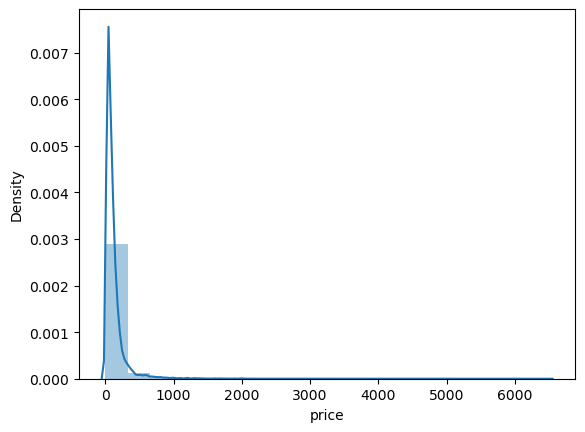

In [111]:
sns.distplot(df_all_avg_delivery['price'], bins=20) # Shows extreme values

# Some of the outliers in the high values may need to be removed.

### 4. Hypothesis and Data prep for regression analysis 

##### The higher is the products price customers are ordering, the lower will be the amount of orders they do.

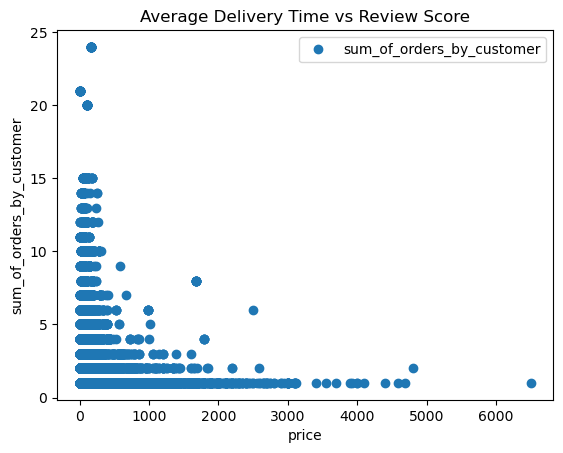

In [89]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df_all_avg_delivery.plot(x = 'price', y='sum_of_orders_by_customer',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Average Delivery Time vs Review Score')  
plt.xlabel('price')  
plt.ylabel('sum_of_orders_by_customer')  
plt.show()

In [91]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df_all_avg_delivery['price'].values.reshape(-1,1)
y = df_all_avg_delivery['sum_of_orders_by_customer'].values.reshape(-1,1)

In [98]:
X

array([[ 29.99],
       [ 29.99],
       [ 29.99],
       ...,
       [249.9 ],
       [599.5 ],
       [ 60.  ]])

In [99]:
y

array([[2],
       [1],
       [1],
       ...,
       [1],
       [1],
       [1]], dtype=int64)

In [100]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 5. Regression analysis

In [101]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [102]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [103]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

### 6. Create a plot that shows the regression line on the test set

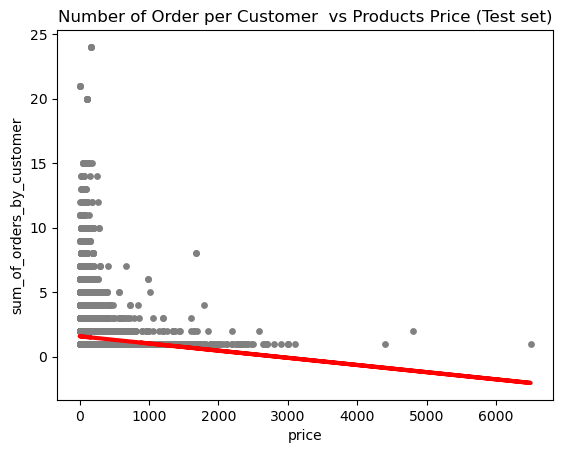

In [104]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Number of Order per Customer  vs Products Price (Test set)')
plot_test.xlabel('price')
plot_test.ylabel('sum_of_orders_by_customer')
plot_test.show()

In [107]:
y_predicted

array([[1.50737795],
       [1.57171416],
       [1.57410522],
       ...,
       [1.54625214],
       [1.48925038],
       [1.08527239]])

### 7. Regression Line Interpretation

#### This regression line doesn't show a strong correlation between these two variables. The line goes slight down, however, it does not indicates that  'The higher is the products price customers are ordering, the lower will be the amount of orders they have done'

##### The higher is the products price customers are ordering, the lower will be the amount of orders they do.

The slope is a coefficient that tells you how the y variable changes when X changes. A negative slope value of -0.00055606
indicates a very weak negative relationship (as X rises, y drops).

The root mean squared error (MSE) tells you how close a regression line is to a set of points (i.e., its accuracy). Thus our value of 1.7483658965972426 running in about 100.000 indicates that this regression model is not the best modelto represent any correlation.

The r-squared value is a number (usually) between 0 and 1, where values closer to 0 indicate a poor fit, and values closer to 1 indicate a good fit. It can also take a negative value if the model fits worse than a horizontal line.
R2 score:  0.0051 does not show any reasonable correlation between these two variables.

### 8. Check the model performance statistics—MSE and R2 score.

In [117]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.00055606]]
Mean squared error:  1.7483658965972426
R2 score:  0.005122355478287988


### 9. Compare the predicted y values with the actual y values in a dataframe

In [115]:
# Create a dataframe comparing the actual and predicted values of y.

data_test = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data_test.head(15)

,Actual,Predicted
0,1,1.507378
1,1,1.571714
2,2,1.574105
3,1,1.574105
4,1,1.561616
5,1,1.554587
6,2,1.479519
7,1,1.570213
8,1,1.501817
9,1,1.571881


### 10. How well did the model performed on the test set?                                                                                                              May there be any impact of possible data bias?

##### The test did perfomer very well, or at least how I expected. That is, customers ordering products with a high price would order less, and customers ordering products with lower prices would order more.

##### The bias on the data is still the timespann, this data set includes data spanning a total of only two year 2016-2018, thus maybe not enough data to get accurate results in such a test.

##### Given that, I'am go to explore possible more correlation in the next section.